# The purpose of this project was to leverage Machine learning classification model, KNN Algorithm to best classify airline passenger satisfaction 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

# Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing statistical libraries for analysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import scikitplot as skplt

In [2]:
train_df = pd.read_csv("train.csv")
df = pd.read_csv("test.csv")

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.shape

(25976, 25)

In [6]:
train_df.shape

(103904, 25)

It's clear that the train data (train_df) has all the records and the test data (df) has 25% of the records.

Also, dropping the unnecessary columns

In [7]:
#After analysing the data, it's clear that the columns named Unnamed and ID seem to be irrelevant so dropping it.
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [8]:
#After analysing the data, it's clear that the columns named Unnamed and ID seem to be irrelevant so dropping it.
train_df = train_df.drop(['Unnamed: 0', 'id'], axis = 1)
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [9]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
print("The number of columns in df is {0} and train_df is {1}". format(len(df.columns), len(train_df.columns)))

The number of columns in df is 23 and train_df is 23


In [12]:
#Understanding how the information is stored in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [13]:
#General statistical analysis for skewness and distribution of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0


As we can see from the above the distribution of data for columns flight distance, departue delay in minutes and arrival delay in minutes seem to be right skewed with the mean of these columns being higher than the median. The 2nd and the 3rd quartile of departue delay in minutes and arrival delay in minutes have no values hence no statistical reference. 

Some key points to note:- 

1. The average departure delay is 14 minutes.
2. The average arrival delay is 14 minutes. 
3. The average inflight wifi service received an overall 2.72 rating on 5.

In [14]:
#Analysing the various datatypes in the data frame
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

Splitting the data into categorical and numerical columns, so the data types object will go into categorical and the integer values will go into numerical columns. 

In [15]:
#Categorical columns
cat_columns = df.select_dtypes(object).columns.to_list()
cat_columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [16]:
#Numerical columns
num_columns = df.select_dtypes(np.number).columns.to_list()
num_columns

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

# Univariate Analysis

In [17]:
#Creating a sample size of 1000 for analysis
sample_data = df.sample(1000)
sample_data.shape

(1000, 23)

In [18]:
#Creating a df with the columns required for analysis
num_columns2 = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
num_columns2 = num_columns2.sample(1000)
num_columns2

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
21931,37,361,0,0.0
1237,38,226,0,0.0
4140,59,3611,0,0.0
22304,49,683,0,0.0
24541,50,3255,4,2.0
...,...,...,...,...
19689,36,369,4,0.0
23166,50,1522,0,6.0
25373,16,325,6,0.0
25122,66,1452,0,0.0


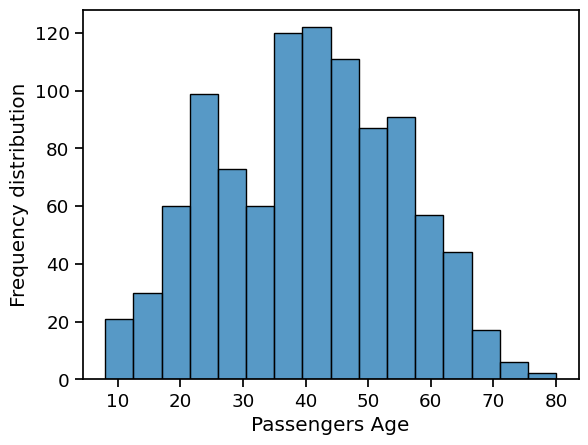

In [19]:
#Plotting the above sample data
sns.set_context('notebook', font_scale=1.2)
sns.histplot(x=num_columns2['Age'])
plt.xlabel('Passengers Age')
plt.ylabel('Frequency distribution')
plt.show()

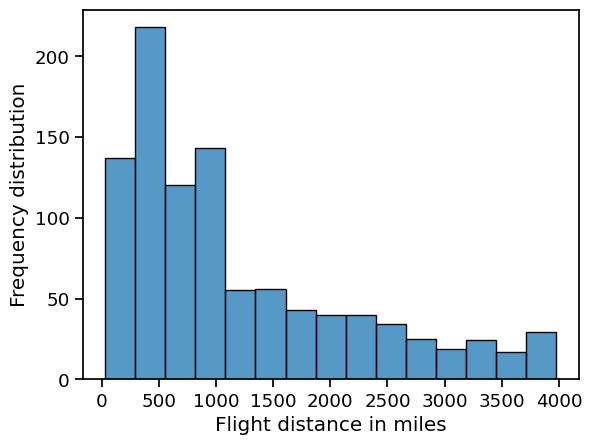

In [20]:
sns.histplot(x=num_columns2['Flight Distance'])
plt.xlabel('Flight distance in miles')
plt.ylabel('Frequency distribution')
plt.show()

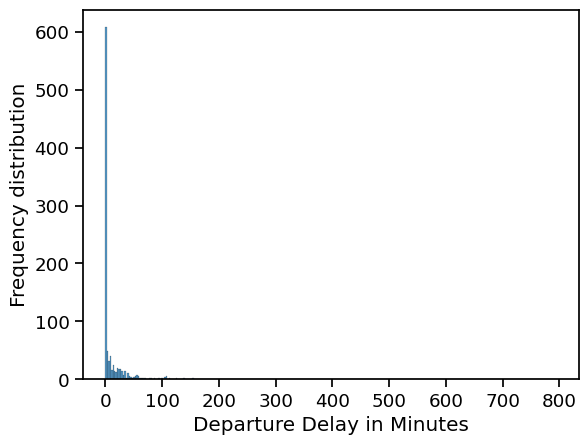

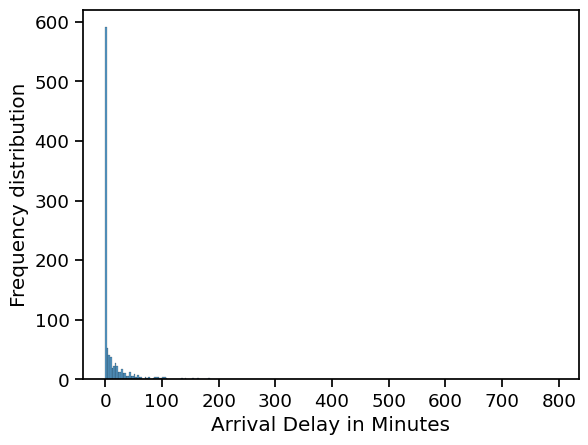

In [21]:
sns.set_context('notebook', font_scale=1.2)
sns.histplot(x=num_columns2['Departure Delay in Minutes'])
plt.ylabel('Frequency distribution')
plt.show()

sns.set_context('notebook', font_scale=1.2)
sns.histplot(x=num_columns2['Arrival Delay in Minutes'])
plt.ylabel('Frequency distribution')
plt.show()

1. Its clear that most of the flights dont have any delay and hence both departure and arrival delay are hevily skwed to the left

2. Most of the flights cover a distance lesser than 1000 miles 

In [22]:
cat_columns2 = df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink','Online boarding','Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service','Inflight service', 'Cleanliness', 'satisfaction' ]].astype(object)
cat_columns2.shape

(25976, 19)

<Axes: xlabel='Cleanliness', ylabel='count'>

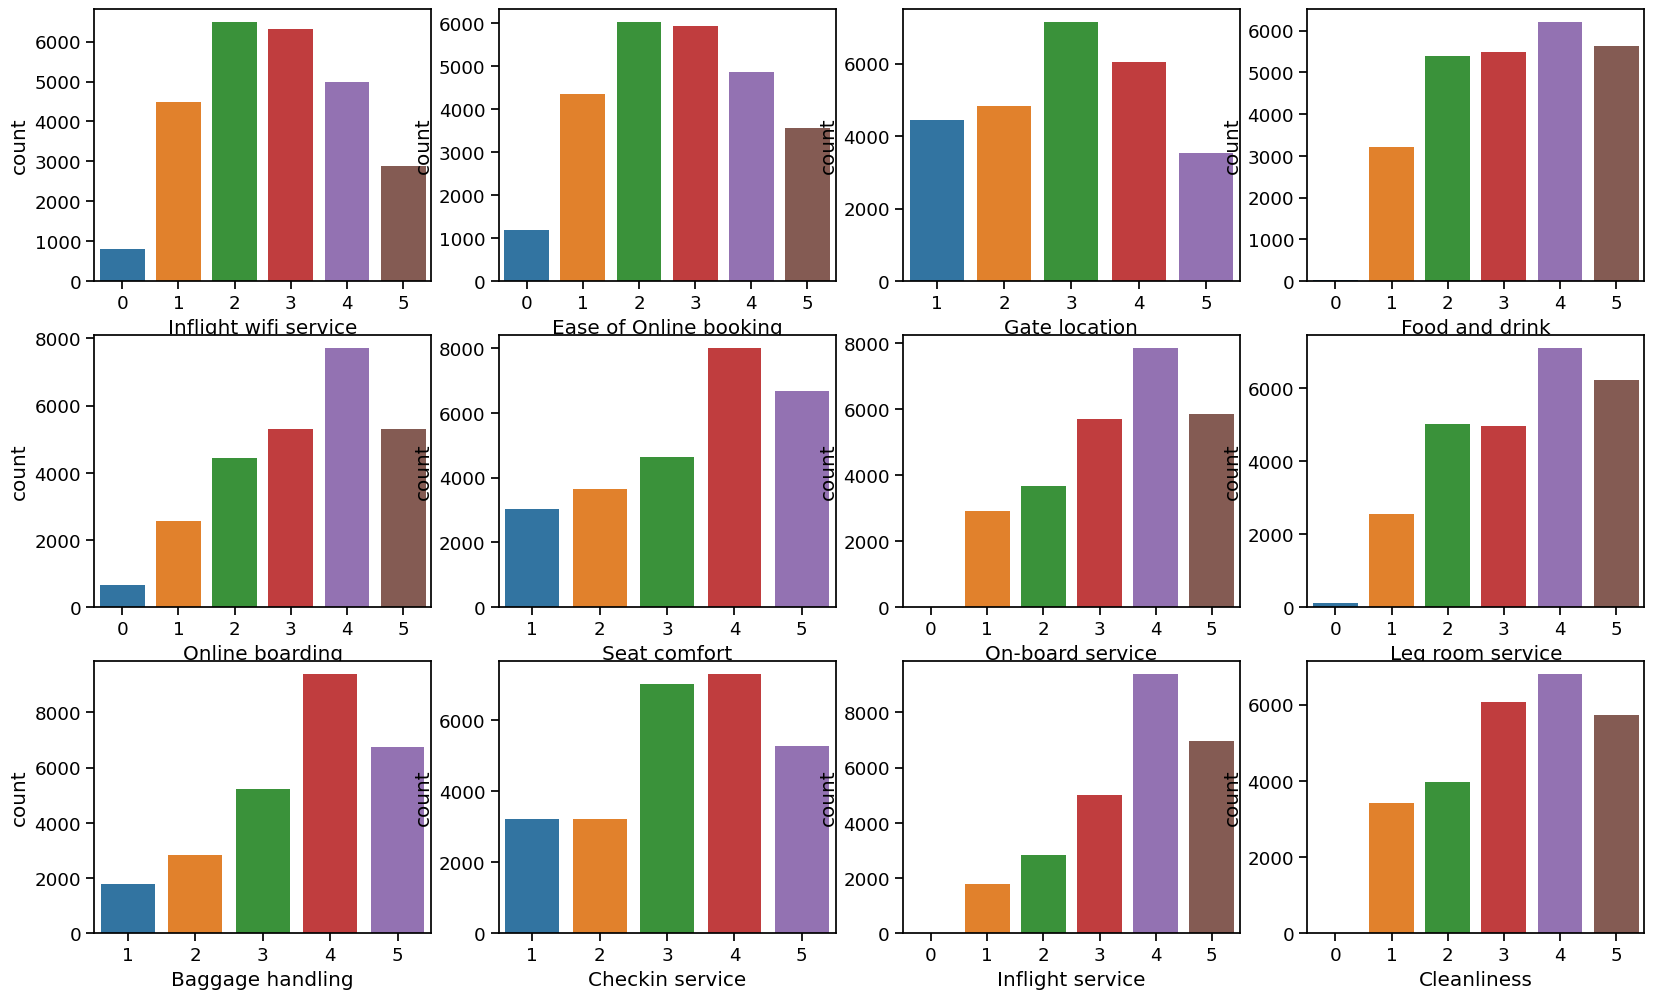

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(20,12)) #3,4 represents the number of rows and columns 
sns.countplot(x='Inflight wifi service', data=cat_columns2, ax = axes[0,0]);
sns.countplot(x='Ease of Online booking', data=cat_columns2, ax = axes[0,1]);
sns.countplot(x='Gate location', data=cat_columns2, ax = axes[0,2]);
sns.countplot(x='Food and drink', data=cat_columns2, ax = axes[0,3]);
sns.countplot(x='Online boarding', data=cat_columns2, ax = axes[1,0]);
sns.countplot(x='Seat comfort', data=cat_columns2, ax = axes[1,1]);
sns.countplot(x='On-board service', data=cat_columns2, ax = axes[1,2]);
sns.countplot(x='Leg room service', data=cat_columns2, ax = axes[1,3]);
sns.countplot(x='Baggage handling', data=cat_columns2, ax = axes[2,0]);
sns.countplot(x='Checkin service', data=cat_columns2, ax = axes[2,1]);
sns.countplot(x='Inflight service', data=cat_columns2, ax = axes[2,2]);
sns.countplot(x='Cleanliness', data=cat_columns2, ax = axes[2,3])

1. It's clear that the food and drinks have equal number frequency distributed amongst ratings i.e 2,3,5 ratings. 
2. Inflight wifi service and ease of online booking received more 2 star ratings in comparisson to other variables.

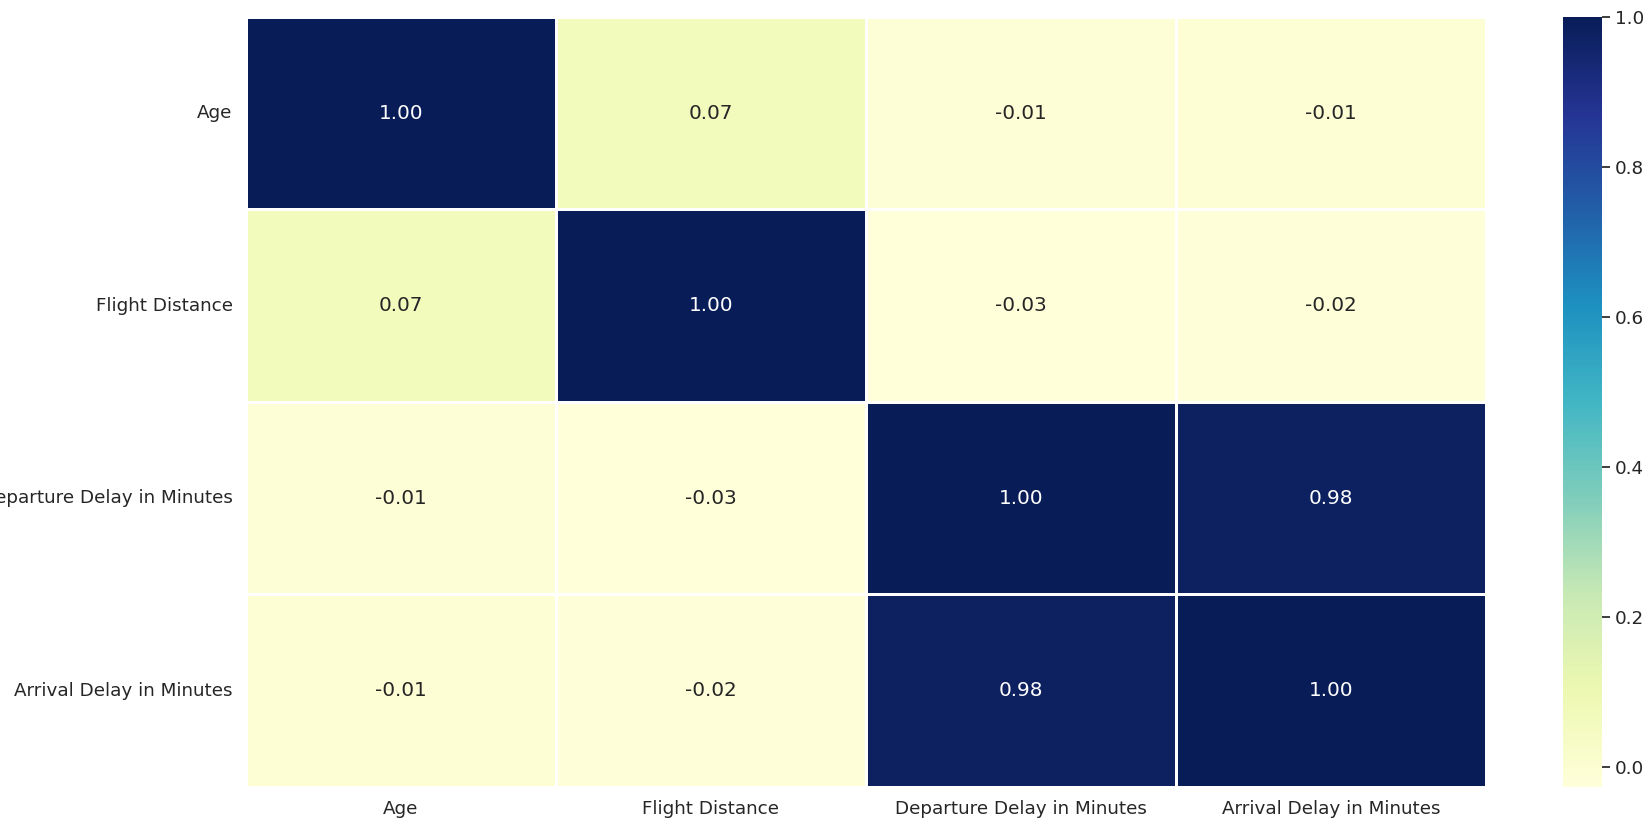

In [24]:
# Bi-Variate Analysis
with sns.axes_style('white'):
    plt.figure(figsize=(20,10))
    sns.heatmap(num_columns2.corr(), annot=True, fmt='.2f',linewidth=.8, cmap="YlGnBu" )

It's clear that departure delay and arrival delay are heavily correlated with each other having a co-relation score of .93 so either of them should be dropped for analysis.

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

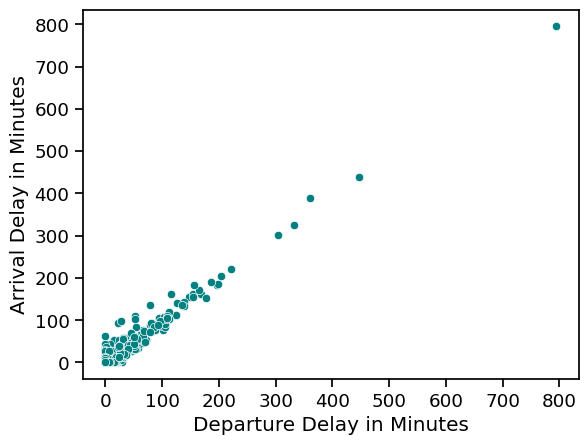

In [25]:
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=num_columns2, color='Teal')

Applying domain knowledge here to understand that if the flight is delayed by x minutes the flight is going to arrival at late by y minutes in most cases the x will almost be equal to y. This is a clear case of multi-colinearity.

In [26]:
#Creating 2 dataframes with the dropped varibales
train_df5 = train_df.drop('Departure Delay in Minutes',axis=1)
df5 = df.drop('Departure Delay in Minutes', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

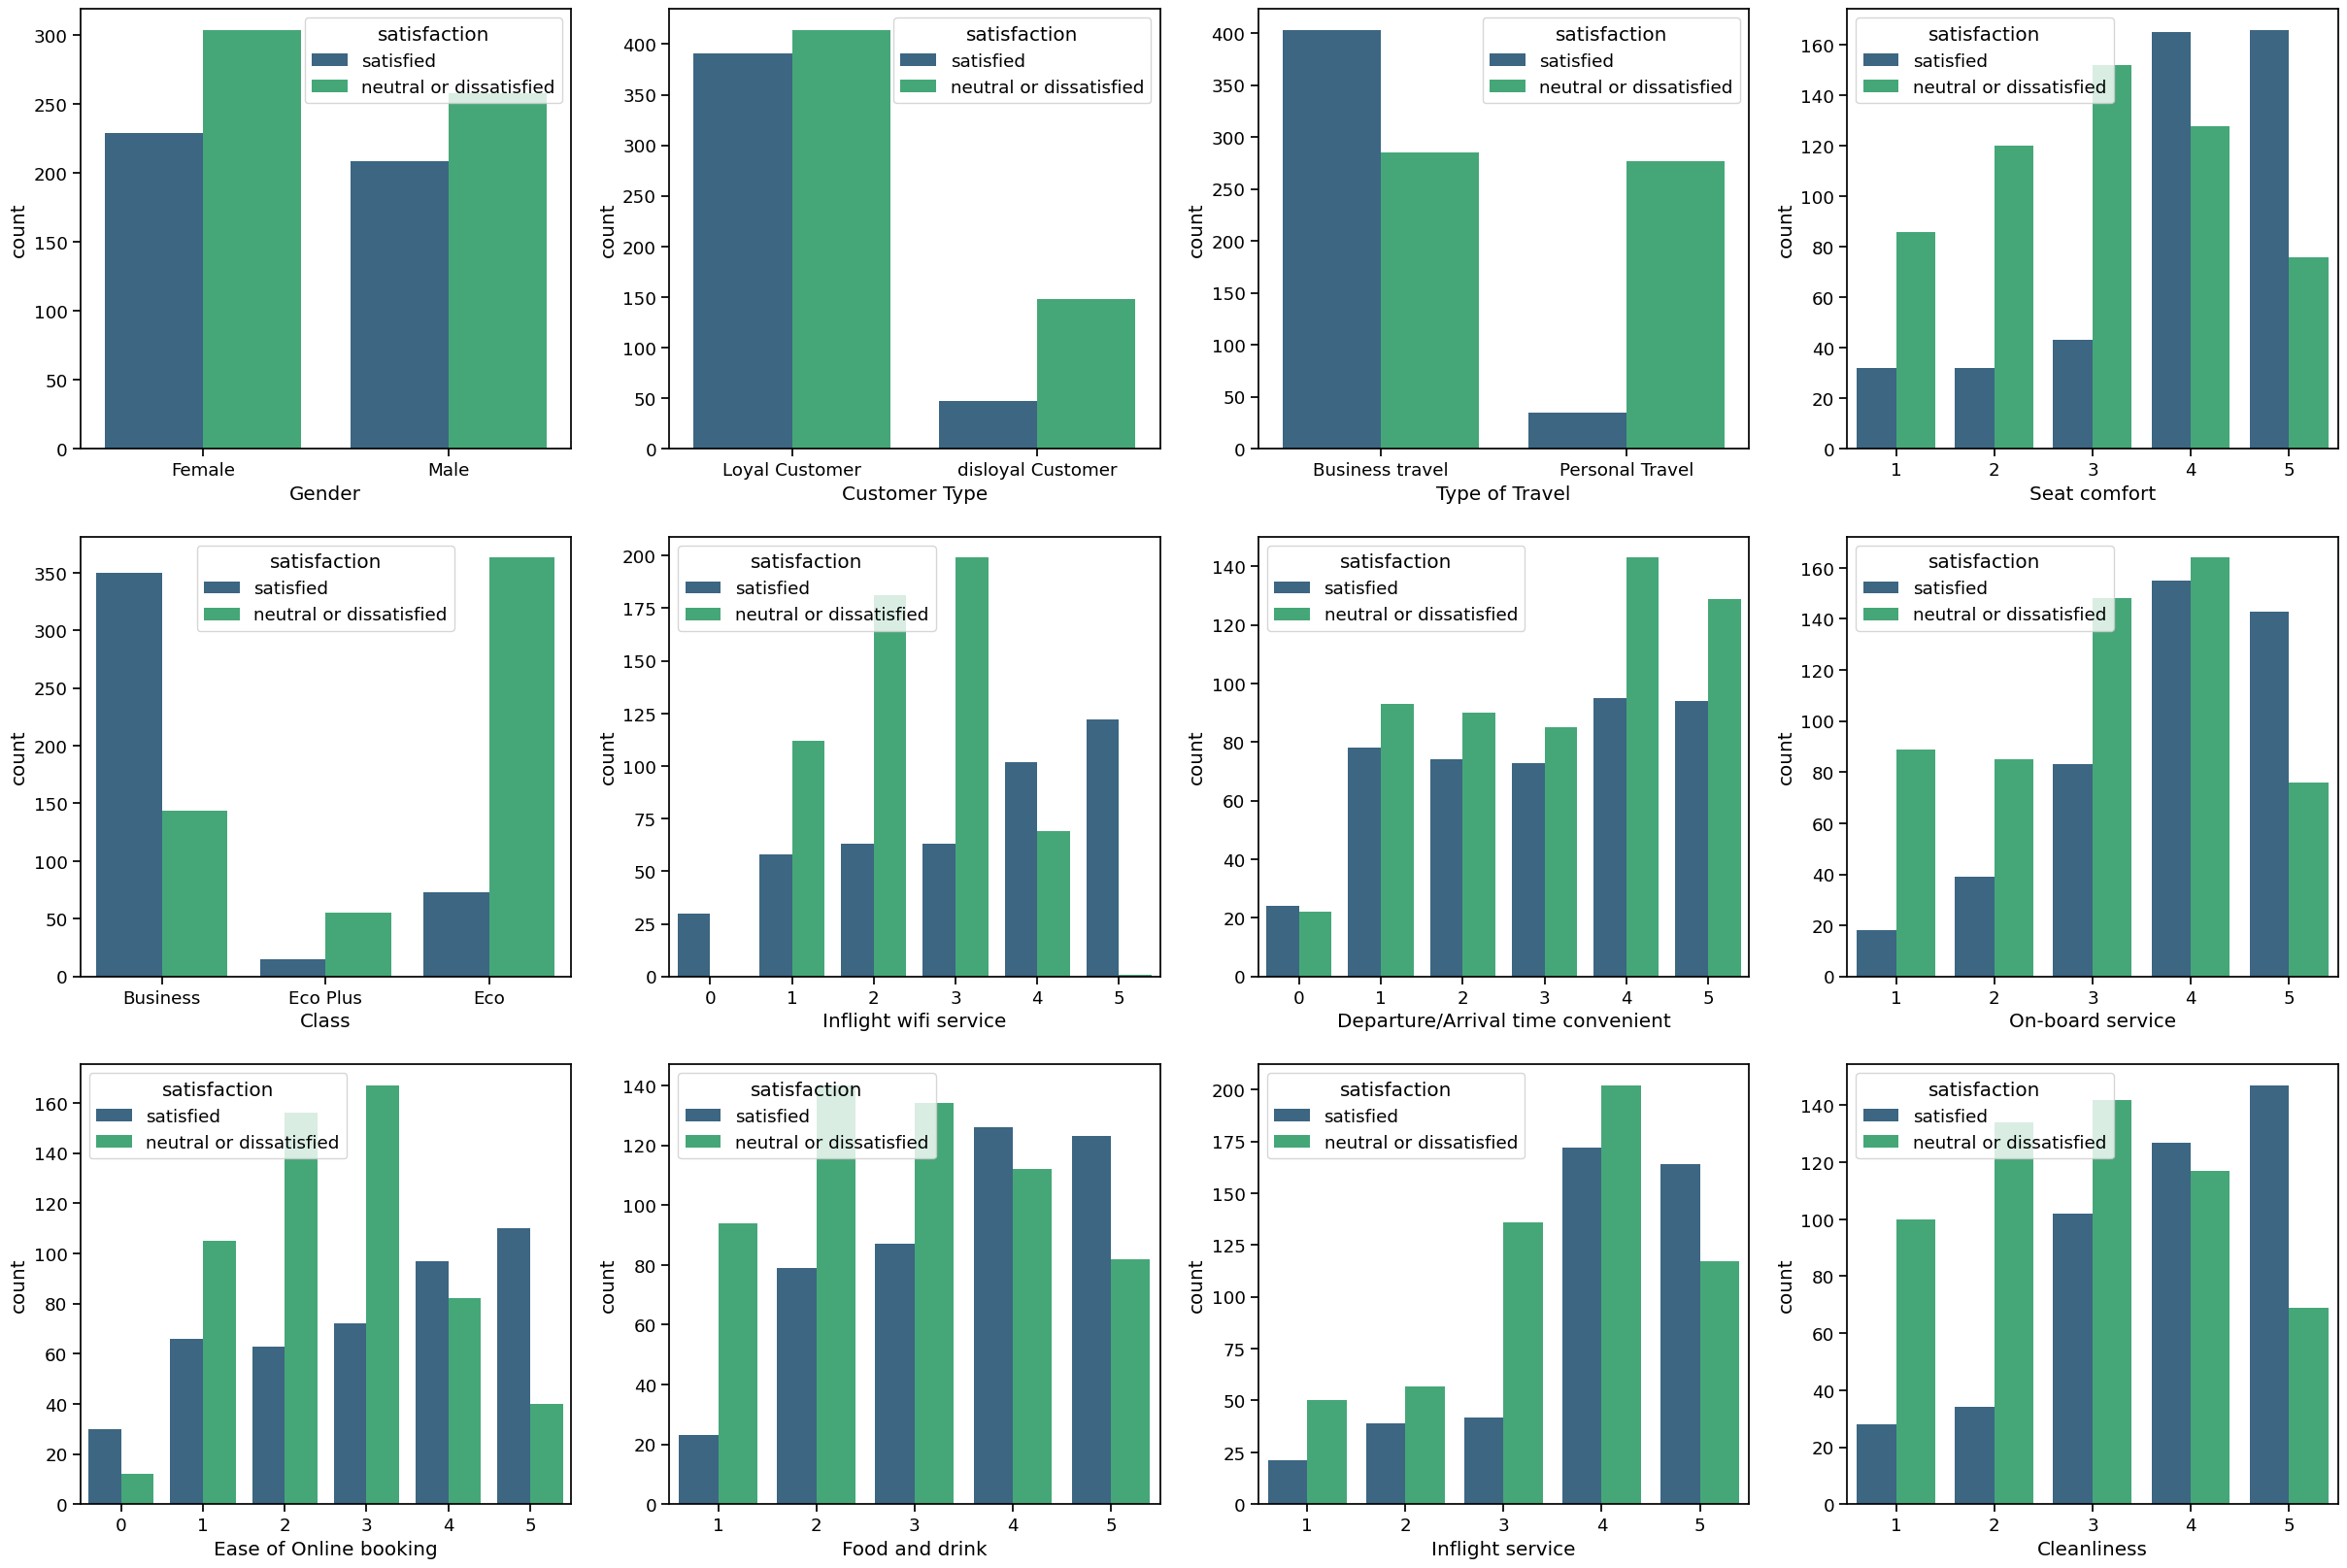

In [27]:
fig, axes = plt.subplots(3,4, figsize=(30,20))
sns.countplot(x='Gender', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[0,0])
sns.countplot(x='Customer Type', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[0,1])
sns.countplot(x='Type of Travel', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[0,2])
sns.countplot(x='Seat comfort', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[0,3])
sns.countplot(x='Class', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[1,0])
sns.countplot(x='Inflight wifi service', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[1,1])
sns.countplot(x='Departure/Arrival time convenient', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[1,2])
sns.countplot(x='On-board service', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[1,3])
sns.countplot(x='Ease of Online booking', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[2,0])
sns.countplot(x='Food and drink', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[2,1])
sns.countplot(x='Inflight service', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[2,2])
sns.countplot(x='Cleanliness', data=sample_data,hue='satisfaction', palette= 'viridis', ax = axes[2,3])
plt.show

1. Passengers travelling in business class are more satisfied in comparison to economy class
2. In gender classification, both male and female passengers showed equal disatisfaction.
3. Majority of the passengers giving 4 or 5 star rating are mostly satisfied. 

# Data Cleaning

In [28]:
#df5 and train_df5 represents the data after being certain columns being dropped incl. departure delay
df5.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [29]:
#Since there are missing values in Arrival Delay column we are using the median value to replace it.
median_val = df5['Arrival Delay in Minutes'].median()
df5['Arrival Delay in Minutes'] = df5['Arrival Delay in Minutes'].fillna(median_val)
train_df5['Arrival Delay in Minutes'] = train_df5['Arrival Delay in Minutes'].fillna(median_val)

In [30]:
df5.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [31]:
cat_columns2.nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        5
Food and drink                       6
Online boarding                      6
Seat comfort                         5
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      5
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

As we can see above there are certain columns containing 0 value which can be found by understanding the categorical columns so for ex, inflight wifi service is 6 which should ideally be 5 and many such columns.

In [32]:
#Feature transformation
columns_con = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service','Cleanliness']
modes = df5[columns_con].mode()
modes

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Inflight entertainment,On-board service,Leg room service,Inflight service,Cleanliness
0,2,4,2,4,4,4,4,4,4,4


In [33]:
df5['Inflight wifi service'][1:5]

1    1
2    2
3    0
4    2
Name: Inflight wifi service, dtype: int64

In [34]:
#Feature transformation by removing the 0 value and replacing it with the mode value of that variable.
df5['Inflight wifi service'] = df5['Inflight wifi service'].replace(0,2)
df5['Departure/Arrival time convenient'] = df5['Departure/Arrival time convenient'].replace(0,4)
df5['Ease of Online booking'] = df5['Ease of Online booking'].replace(0,2)
df5['Food and drink'] = df5['Food and drink'].replace(0,4)
df5['Online boarding'] = df5['Online boarding'].replace(0,4)
df5['Inflight entertainment'] = df5['Inflight entertainment'].replace(0,4)
df5['On-board service'] = df5['On-board service'].replace(0,4)
df5['Leg room service'] = df5['Leg room service'].replace(0,4)
df5['Inflight service'] = df5['Inflight service'].replace(0,4)
df5['Cleanliness'] = df5['Cleanliness'].replace(0,4)

In [35]:
df5.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

<Axes: xlabel='Inflight wifi service', ylabel='count'>

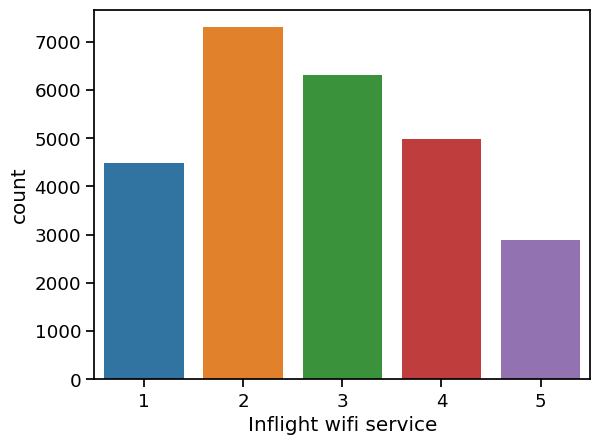

In [36]:
#Checking if the replacement has worked correctly by plotting the below
sns.countplot(x='Inflight wifi service', data=df5) #just checking if the feature transformation has worked or not

In [37]:
#Since a lot of data points are skewed applying feature transformation.
#All the data that was purely negatively skewed we are normalising them

df5['Flight Distance'] = np.log1p(df5['Flight Distance'])
train_df5['Flight Distance'] = np.log1p(train_df5['Flight Distance'])
df5['Arrival Delay in Minutes'] = np.log1p(df5['Arrival Delay in Minutes'])

# Encoding

In [38]:
#Representing the categorical information into numerical form aka assigning values.

df5['Gender'] = df5['Gender'].map({'Male':0, 'Female':1})
df5['Customer Type'] = df5['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1}) 
df5['Type of Travel'] = df5['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df5['Class'] = df5['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df5['satisfaction'] = df5['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


train_df5['Gender'] = train_df5['Gender'].map({'Male' : 0, 'Female' : 1})
train_df5['Customer Type'] = train_df5['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
train_df5['Type of Travel'] = train_df5['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
train_df5['Class'] = train_df5['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
train_df5['satisfaction'] = train_df5['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

# Feature Scaling

In [39]:
df5.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [40]:
train_df5.shape

(103904, 22)

In [41]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

X_test = df5.drop('satisfaction', axis=1)
Y_test = df5['satisfaction']

X_train = train_df5.drop('satisfaction', axis=1)
Y_train = train_df5['satisfaction']

In [42]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
s = StandardScaler()
s_train = s.fit_transform(X_train)
s_test = s.transform(X_test)

# K Nearest Neighbour

In [43]:
X_train['Arrival Delay in Minutes'] = X_train['Arrival Delay in Minutes'].fillna(median_val)
X_test['Arrival Delay in Minutes'] = X_test['Arrival Delay in Minutes'].fillna(median_val)

#Initialising KNN model
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train, Y_train)

k = KFold(n_splits=5)

#Understanding the score
score = cross_val_score(knn, X_train, Y_train, scoring='accuracy', cv=k).mean()

print("The accuracy of the training data set is", round(score, 2))

The accuracy of the training data set is 0.89


In [44]:
y_predict = knn.predict(X_test)
print("The accuracy score is", round(accuracy_score(Y_test, y_predict),2))

The accuracy score is 0.9


In [45]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14573
           1       0.90      0.85      0.88     11403

    accuracy                           0.90     25976
   macro avg       0.90      0.89      0.89     25976
weighted avg       0.90      0.90      0.90     25976



# Choosing a k value

In [46]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    predict_i = knn.predict(X_test)
    accuracy_i = accuracy_score(Y_test, predict_i)
    accuracy.append(accuracy_i)

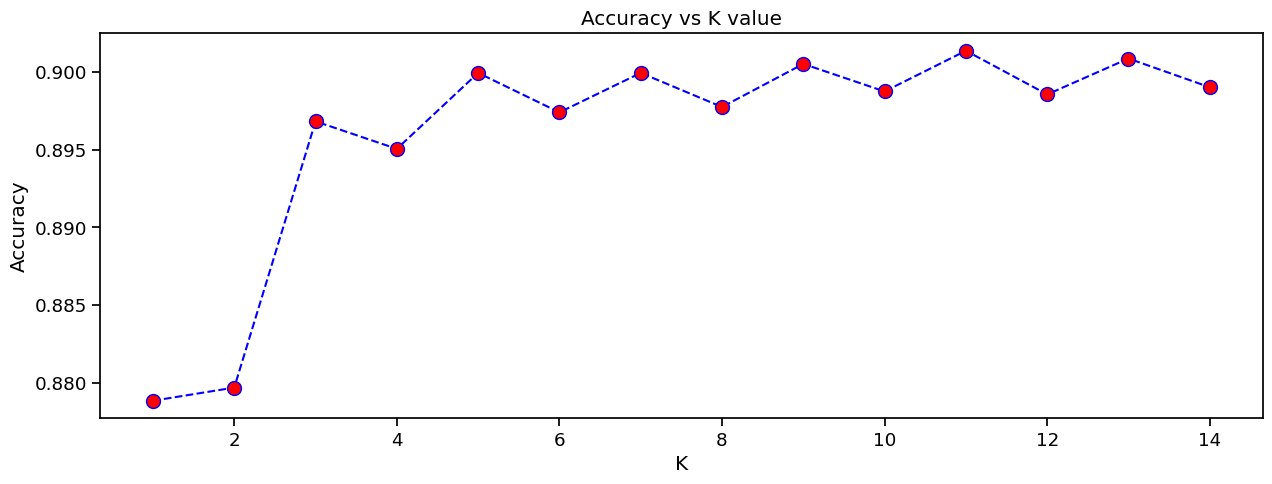

In [47]:
plt.figure(figsize=(15,5))
plt.plot(range(1,15,1), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K value')
plt.show()

It's clear that the k value is highest at 7 and 9 indicating higher accuracy score

In [48]:
#Initialising KNN model
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train, Y_train)

#predicting
y_predict = knn.predict(X_test)

In [49]:
accuracy1 = accuracy_score(Y_test, y_predict)
print("The accuracy score is", accuracy1*100)

The accuracy score is 89.99461040960887


In [50]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14573
           1       0.91      0.85      0.88     11403

    accuracy                           0.90     25976
   macro avg       0.90      0.89      0.90     25976
weighted avg       0.90      0.90      0.90     25976



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

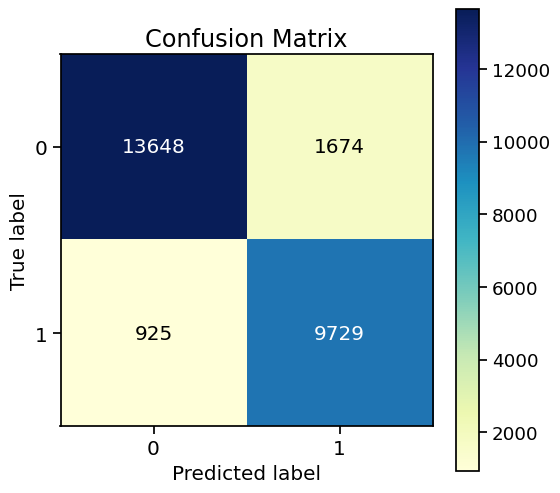

In [51]:
skplt.metrics.plot_confusion_matrix(y_predict, Y_test,figsize=(6,6), cmap='YlGnBu')

In [52]:
df5['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

1. The recall/sensitivity value here is 0.94 for 0 and 0.85 for 1
2. The prevalence value here is 0.85
